### Problemas de Valores iniciais (PVI)

$$
    \begin{equation}
      \dfrac{dy}{dx}=-2x^{3}+12x^{2}-20x+8.5
    \end{equation} \\
    y(0)=1
$$
#### Solução Exata:
$$
    \begin{equation}
      y=-0.5x^{4}+4x^{3}-10x^{2}+8.5x+1
    \end{equation}
$$

In [1]:
import sympy as sy
import numpy as np
import time as tm
import pandas as pd
import matplotlib.pyplot as plt

$$y_{i+1}=y_{i}+f(x_{i},y_{i})h$$

In [2]:
def m_euler(xi,xf,f,y0,h):
    
    n=int(((xf-xi)/h)+1)
    x=np.linspace(xi,xf,n)
    fx=np.empty(n)
    fx[0]=y0
    
    for i in range(1,n):
        fx[i]=fx[i-1]+f(x[i-1],fx[i-1])*h   
    return x,fx   

In [3]:
x,y=sy.symbols('x y')
f=(-2*x**3)+(12*x**2)+(-20*x)+8.5
f=sy.lambdify((x,y),f,'numpy')


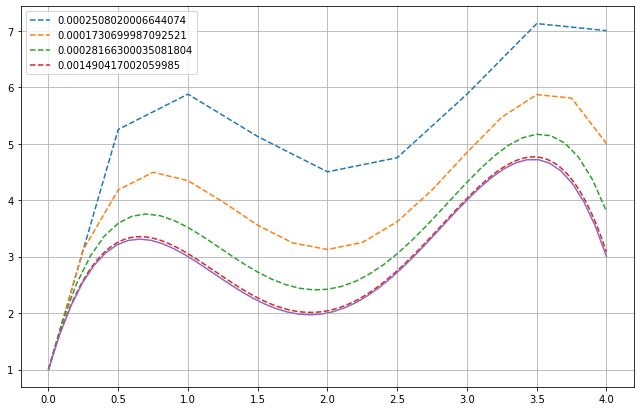

In [5]:
fig=plt.figure(figsize=(11,7))
plt.grid()
h=[0.5,0.25,0.1,1e-2]
tempo=[]
for i in h:
    inicio = tm.perf_counter()
    x,fx=m_euler(0,4,f,1,i)
    fim = tm.perf_counter()
    tempo.append(fim-inicio)
    plt.plot(x,fx,linestyle='--')
tabela={'Tempo':tempo}
x=np.linspace(0,4)
y=(-(0.5*x**4)+(4*x**3)-(10*x**2)+(8.5*x)+1)
_=plt.plot(x,y)
_=plt.legend(tempo)

In [6]:
pd.DataFrame(tabela)

,Tempo
0,0.000251
1,0.000173
2,0.000282
3,0.001490


#### Método de  Runge Kutta de segunda ordem

$$ y_{i+1}=y_{i}+k_{2}h$$

$$ k_{1}=f(x_{i},y_{i}) $$

$$ k_{2}=f(x_{i}+\dfrac{1}{2}h,yi+\dfrac{1}{2}k_{1}h)$$


In [7]:
def runge_kutta_2(xi,xf,f,y0,h):
    n=int(((xf-xi)/h)+1)
    x=np.linspace(xi,xf,n)
    k=np.empty(2)
    fx=np.empty(n)
    fx[0]=y0
    for i in range(1,n):
        k[0]=f(x[i-1],fx[i-1])
        k[1]=f(x[i-1]+(0.5*h),fx[i-1]+(0.5*k[0]*h))
        fx[i]=fx[i-1]+k[1]*h
    return x,fx   

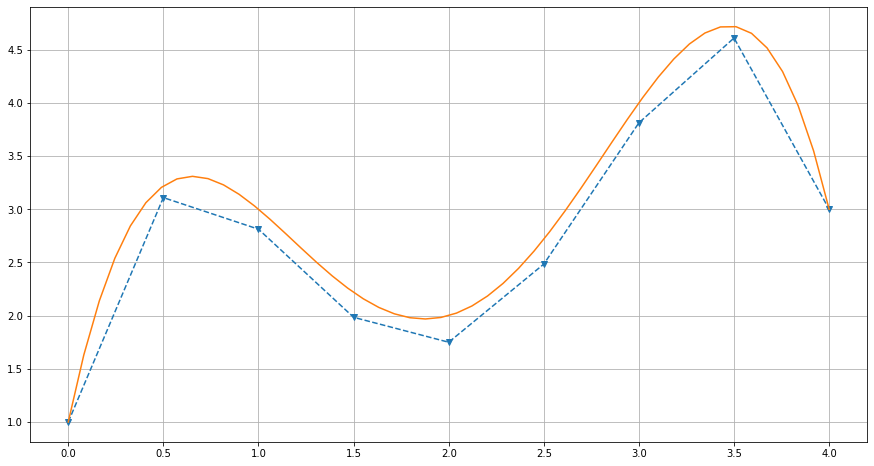

In [26]:
tempo=[]

x,y=sy.symbols('x y')

f=(-2*x**3)+(12*x**2)+(-20*x)+8.5

f=sy.lambdify((x,y),f,'numpy')

fig=plt.figure(figsize=(15,8))

plt.grid()

inicio = tm.perf_counter()
x,fx=runge_kutta_2(0,4,f,1,0.5)
fim = tm.perf_counter()
tempo.append(fim-inicio)
_=plt.plot(x,fx,linestyle='--',marker='v')
x=np.linspace(0,4)
y=(-(0.5*x**4)+(4*x**3)-(10*x**2)+(8.5*x)+1)
_=plt.plot(x,y)

#### Método de Runge Kutta de terceira ordem

$$ y_{i+1}=y_{i}+\dfrac{1}{6}(k_{1}+4k_{2}+k_{3})h$$

$$ k_{1}=f(x_{i},y_{i}) $$

$$ k_{2}=f(x_{i}+\dfrac{1}{2}h,yi+\dfrac{1}{2}k_{1}h)$$

$$ k_{3}=f(x_{i}+h,y_{i}-k_{1}h+2k_{2}h)$$

In [19]:
def runge_kutta_3(xi,xf,f,y0,h):
    n=int(((xf-xi)/h)+1)
    x=np.linspace(xi,xf,n)
    k=np.empty(3)
    fx=np.empty(n)
    fx[0]=y0
    for i in range(1,n):
        k[0]=f(x[i-1],fx[i-1])
        k[1]=f(x[i-1]+(0.5*h),fx[i-1]+(0.5*k[0]*h))
        k[2]=f(x[i-1]+h,fx[i-1] + h*(-k[0]+2*k[1]))
        
        fx[i]=fx[i-1] + h*(k[0]+4*k[1]+k[2])/6  
    return x,fx   

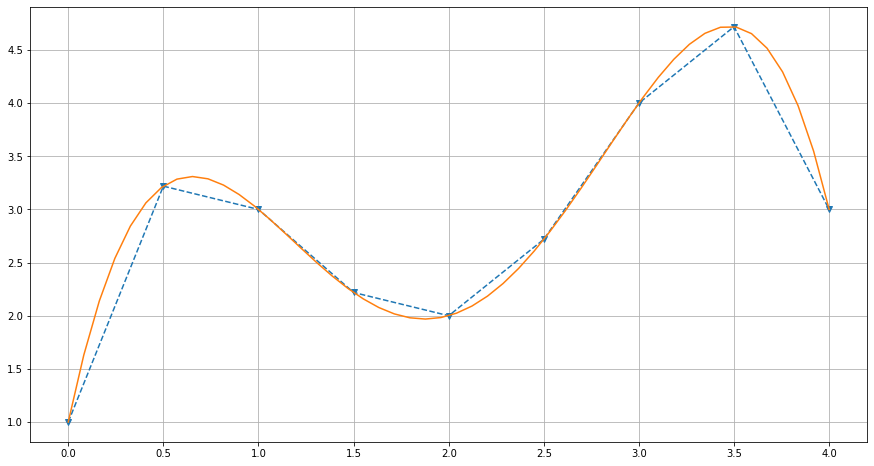

In [27]:
tempo=[]

x,y=sy.symbols('x y')

f=(-2*x**3)+(12*x**2)+(-20*x)+8.5

f=sy.lambdify((x,y),f,'numpy')

fig=plt.figure(figsize=(15,8))

plt.grid()

inicio = tm.perf_counter()
x,fx=runge_kutta_3(0,4,f,1,0.5)
fim = tm.perf_counter()
tempo.append(fim-inicio)
_=plt.plot(x,fx,linestyle='--',marker='v')
x=np.linspace(0,4)
y=(-(0.5*x**4)+(4*x**3)-(10*x**2)+(8.5*x)+1)
_=plt.plot(x,y)

#### Método de Runge Kutta de quarta ordem

$$ y_{i+1}=y_{i}+\dfrac{1}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})h$$

$$ k_{1}=f(x_{i},y_{i}) $$

$$ k_{2}=f(x_{i}+\dfrac{1}{2}h,yi+\dfrac{1}{2}k_{1}h)$$

$$ k_{3}=f(x_{i}+\dfrac{1}{2}h,yi+\dfrac{1}{2}k_{2}h)$$

$$ k_{4}=f(x_{i}+h,y_{i}+k_{3}h)$$

In [15]:
def runge_kutta_4(xi,xf,f,y0,h):
    n=int(((xf-xi)/h)+1)
    x=np.linspace(xi,xf,n)
    k=np.empty(4)
    fx=np.empty(n)
    fx[0]=y0
    for i in range(1,n):
        k[0]=f(x[i-1],fx[i-1])
        k[1]=f(x[i-1]+(0.5*h),fx[i-1]+(0.5*k[0]*h))
        k[2]=f(x[i-1]+(0.5*h),fx[i-1]+(0.5*k[1]*h))
        k[3]=f(x[i-1]+h,fx[i-1]+(k[2]*h))
        fx[i]=fx[i-1]+np.sum((((1/6)*k[0::3])+((1/3)*(k[1:3])))*h)
    return x,fx   

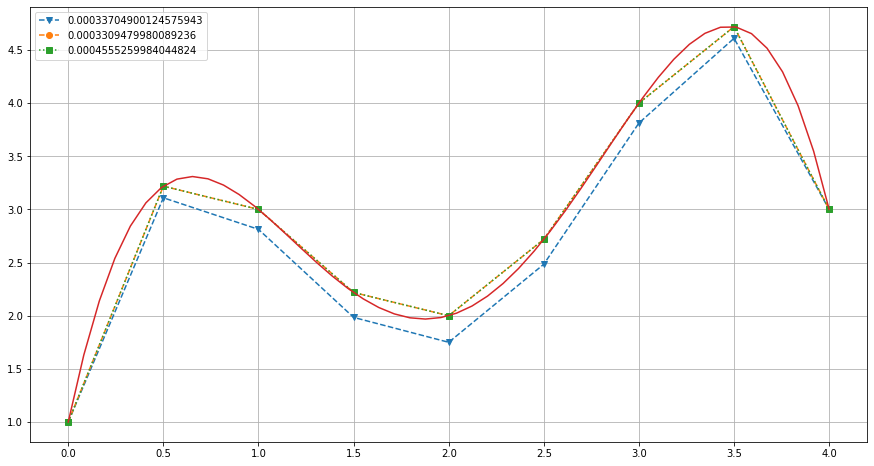

In [21]:
tempo=[]

x,y=sy.symbols('x y')

f=(-2*x**3)+(12*x**2)+(-20*x)+8.5

f=sy.lambdify((x,y),f,'numpy')

fig=plt.figure(figsize=(15,8))

plt.grid()

inicio = tm.perf_counter()
x,fx=runge_kutta_2(0,4,f,1,0.5)
fim = tm.perf_counter()
tempo.append(fim-inicio)
plt.plot(x,fx,linestyle='--',marker='v')

inicio = tm.perf_counter()
x,fx=runge_kutta_3(0,4,f,1,0.5)
fim = tm.perf_counter()
tempo.append(fim-inicio)
plt.plot(x,fx,linestyle='--',marker='o')

inicio = tm.perf_counter()
x,fx=runge_kutta_4(0,4,f,1,0.5)
fim = tm.perf_counter()
tempo.append(fim-inicio)
plt.plot(x,fx,linestyle=':',marker='s')
plt.legend(tempo)
x=np.linspace(0,4)
y=(-(0.5*x**4)+(4*x**3)-(10*x**2)+(8.5*x)+1)
_=plt.plot(x,y)

### Voltando ao paraquedista


$$
    \dfrac{dv}{dt}=g-\dfrac{c}{m}v
$$
#### Solução
$$
v(t)=\dfrac{gm}{c}(1-e^{-\left(c/m\right)t})
$$

Um modelo a velocidade baseado em uma descrição matemática mais completa da força de arrasto causada pela resistência do ar.
$$
    \dfrac{dv}{dt}=g-\dfrac{c}{m}\left[v+a\left(\dfrac{v}{v_{max}}\right)^b\right]
$$

$a$ ,  $b$  e  $v_{máx}$  são constantes empíricas, as quais, para esse caso, são iguais a 8,3; 2,2 e 46, respectivamente.

In [28]:
from sympy.abc import a,g,m,c,v,u,b,w
f_n_l=g-(c/m)*(v+(a*(v/u)**b))
f_n_l=f_n_l.subs([(g,9.8),(m,68.1),(c,12.5),(a,8.3),(b,2.2),(u,46)])
dv=sy.lambdify((w,v),f_n_l,'numpy')

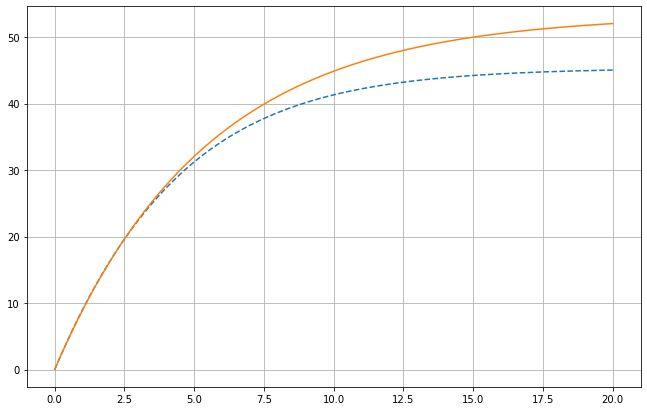

In [29]:
fig=plt.figure(figsize=(11,7))
x,fx=m_euler(0,20,dv,0,.1)
plt.grid()
plt.plot(x,fx,linestyle='--')
from sympy.abc import g,m,c,t
f_l=((g*m)/c)*(1-sy.exp((-c/m)*t))
f_l=f_l.subs([(g,9.8),(m,68.1),(c,12.5)])
v=sy.lambdify(t,f_l,'numpy')
t=np.linspace(0,20,200)
_=plt.plot(t,v(t))